## Q.
<b>Perform PCA and KNN on Iris Dataset.</b><br>
Given p dimensions in your data ,

● calculate p eigenvectors and eigenvalues<br>
● choose only the first k eigenvectors<br>
● final data set has only k dimensions<br>
● Experiment and choose value of K and evaluate model’s performance.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
iris_data = pd.read_csv("/content/IRIS.csv")

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(iris_data['species'])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [ ]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#convert 'species' column to numerical
mapping = {'Iris-setosa':0,
           'Iris-versicolor':1,
           'Iris-virginica':2
           }
iris_data['species'] = iris_data['species'].map(mapping)
iris_data['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

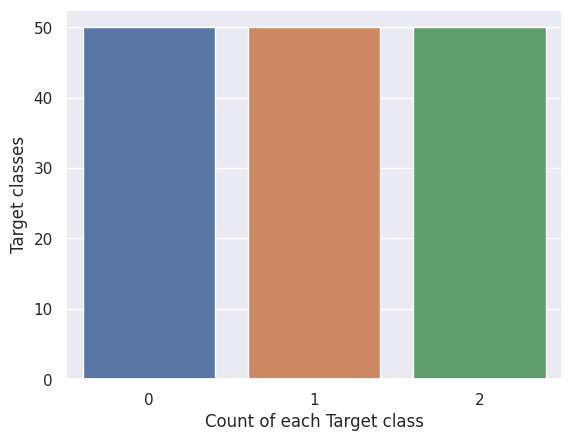

In [ ]:
sns.countplot(x=iris_data.species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

Above analysis reveals that:
- There are no missing values in the data.
- 4 independent varaibales.
- 3 output classes.
- All 4 independed variables have same unit and same data type(float).

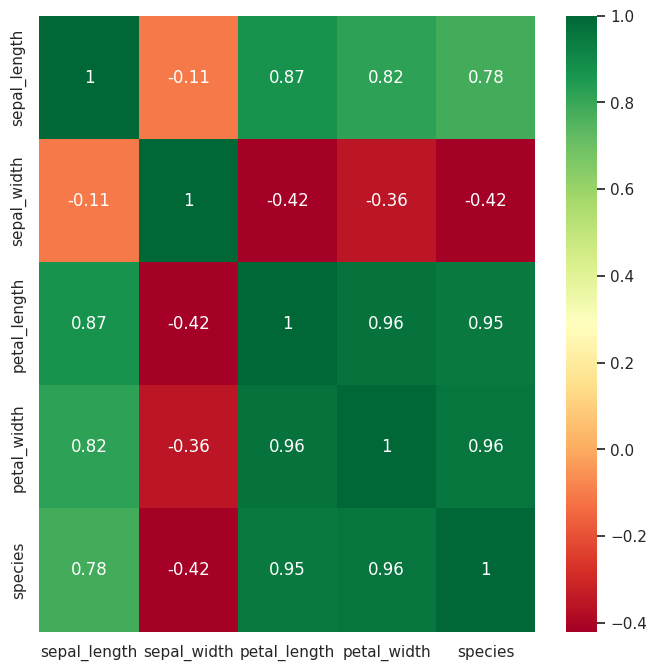

In [ ]:
plt.figure(figsize=(8,8))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn')

In [ ]:
cov = iris_data.corr()
cov

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


As clear from the heat map, <b>sepal_width</b> seems to be less relevent in explaing the class of the flower. (Negative correlation)

In [ ]:
R = np.array(iris_data)

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov)

# print values and corresponding vectors
print("Eigen Values:\n", eig_values)
print("----")
print("Eigen Vectors:\n", eig_vectors)

Eigen Values:
 [3.82954265 0.92138785 0.18651471 0.02044182 0.04211297]
----
Eigen Vectors:
 [[-0.44562611  0.37804172  0.75213041  0.27008753  0.14090563]
 [ 0.22858246  0.92268061 -0.28533914 -0.12233999  0.00500553]
 [-0.50657161  0.02641607  0.02912116 -0.82526712 -0.24652289]
 [-0.49736266  0.07007419 -0.38662225  0.47600623 -0.6096403 ]
 [-0.49515959 -0.01169435 -0.4500629   0.06661758  0.74005791]]


In [ ]:
#lets pick two eigen vectors only for k=3
featureVector = eig_vectors[:,:3]
featureVector

array([[-0.44562611,  0.37804172,  0.75213041],
       [ 0.22858246,  0.92268061, -0.28533914],
       [-0.50657161,  0.02641607,  0.02912116],
       [-0.49736266,  0.07007419, -0.38662225],
       [-0.49515959, -0.01169435, -0.4500629 ]])

In [ ]:
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape

(150, 3)

In [ ]:
y = iris_data.species
X = iris_data.drop(['species'],axis=1)

pca = PCA()
X_new = pca.fit_transform(X)
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


<ipython-input-109-d78f2e9c380e>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


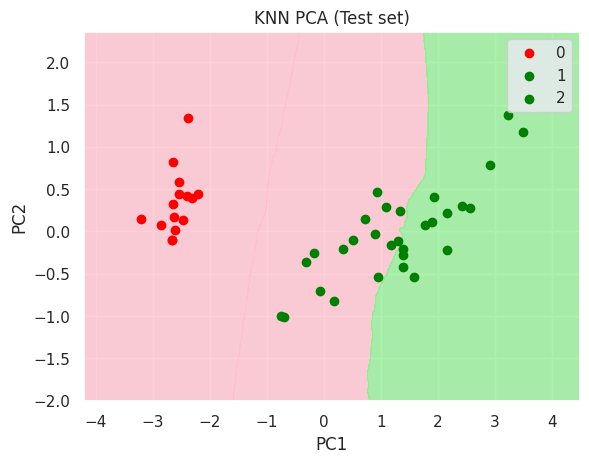

In [ ]:
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
#let us take k=2 now and check performance
featureVector = eig_vectors[:,:2]
featureVector

array([[-0.44562611,  0.37804172],
       [ 0.22858246,  0.92268061],
       [-0.50657161,  0.02641607],
       [-0.49736266,  0.07007419],
       [-0.49515959, -0.01169435]])

In [ ]:
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape

(150, 2)

In [ ]:
y = iris_data.species
X = iris_data.drop(['species'],axis=1)

pca = PCA()
X_new = pca.fit_transform(X)
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9333333333333333 %


<b>Observation</b><br>
When k = 3 => Test Score = 0.97<br>
When k = 2 => Test Score = 0.93<br>
Hence reducing the dimensions reduces the accuracy.